In [1]:
#Import our standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Clearned Dataset
fname = "titanic_cleaned.csv"
df = pd.read_csv(fname) 

In [4]:
df.shape

(891, 16)

In [5]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_ind        0
New_fare         0
Family_Cnt       0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,New_fare,Family_Cnt
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,7.2500,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,7.9250,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,53.1000,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,8.0500,0


In [7]:
#Check for multi-collinearity
cormat = df.corr()
round(cormat,2)

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_ind,New_fare,Family_Cnt
Unnamed: 0,1.00,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01,0.02,0.01,-0.04
PassengerId,1.00,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01,0.02,0.01,-0.04
Survived,-0.01,-0.01,1.00,-0.34,-0.07,-0.04,0.08,0.26,0.32,0.31,0.02
Pclass,-0.04,-0.04,-0.34,1.00,-0.33,0.08,0.02,-0.55,-0.73,-0.70,0.07
Age,0.03,0.03,-0.07,-0.33,1.00,-0.23,-0.18,0.09,0.23,0.13,-0.25
SibSp,-0.06,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16,-0.04,0.25,0.89
Parch,-0.00,-0.00,0.08,0.02,-0.18,0.41,1.00,0.22,0.04,0.26,0.78
Fare,0.01,0.01,0.26,-0.55,0.09,0.16,0.22,1.00,0.48,0.85,0.22
Cabin_ind,0.02,0.02,0.32,-0.73,0.23,-0.04,0.04,0.48,1.00,0.61,-0.01
New_fare,0.01,0.01,0.31,-0.70,0.13,0.25,0.26,0.85,0.61,1.00,0.30


In [8]:
#Select only required classes and separate dependent & independent variables
cols_needed = ['Pclass', 'Sex','Age','Embarked', 'Cabin_ind','New_fare','Family_Cnt']
X = df[cols_needed]
y = df['Survived']

In [9]:
#Create dummies for qualitative variables
X = pd.get_dummies(X, columns = ['Pclass','Sex','Embarked'])

In [10]:
X.head()

,Age,Cabin_ind,New_fare,Family_Cnt,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,7.2500,1,0,0,1,0,1,0,0,1
1,38.0,1,71.2833,1,1,0,0,1,0,1,0,0
2,26.0,0,7.9250,0,0,0,1,1,0,0,0,1
3,35.0,1,53.1000,1,1,0,0,1,0,0,0,1
4,35.0,0,8.0500,0,0,0,1,0,1,0,0,1


In [11]:
#Remove gender female, as gender-male is enough
X.drop('Sex_female', axis =1, inplace = True)

In [12]:
X.head()

,Age,Cabin_ind,New_fare,Family_Cnt,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,7.2500,1,0,0,1,1,0,0,1
1,38.0,1,71.2833,1,1,0,0,0,1,0,0
2,26.0,0,7.9250,0,0,0,1,0,0,0,1
3,35.0,1,53.1000,1,1,0,0,0,0,0,1
4,35.0,0,8.0500,0,0,0,1,1,0,0,1


In [13]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [14]:
#Check the shape of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 11)
(712,)
(179, 11)
(179,)


In [15]:
179/(712+179)

0.20089786756453423

In [16]:
#load Logistic Regression
from sklearn.linear_model import LogisticRegression

In [17]:
#Fit logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [18]:
#Check co-efficients 
lr_model.coef_

array([[-0.03114614,  0.65184517,  0.00760379, -0.22725364,  0.72876684,
         0.61040912, -0.41227892, -2.63069299,  0.50454395,  0.57002626,
        -0.14767316]])

In [19]:
#Look at the intercept
lr_model.intercept_

array([1.72892945])

In [20]:
#predict for test data
predictions = lr_model.predict(X_test)

In [21]:
predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [22]:
#If you want probability
lr_model.predict_proba(X_test)

array([[0.83342522, 0.16657478],
       [0.76514985, 0.23485015],
       [0.91668475, 0.08331525],
       [0.1625861 , 0.8374139 ],
       [0.10021369, 0.89978631],
       [0.06074294, 0.93925706],
       [0.98417825, 0.01582175],
       [0.98417825, 0.01582175],
       [0.17216884, 0.82783116],
       [0.22591096, 0.77408904],
       [0.87273186, 0.12726814],
       [0.70601923, 0.29398077],
       [0.19550907, 0.80449093],
       [0.9212515 , 0.0787485 ],
       [0.86861421, 0.13138579],
       [0.27242041, 0.72757959],
       [0.75568083, 0.24431917],
       [0.26979775, 0.73020225],
       [0.90652387, 0.09347613],
       [0.84717984, 0.15282016],
       [0.82508269, 0.17491731],
       [0.84284388, 0.15715612],
       [0.88950749, 0.11049251],
       [0.91221398, 0.08778602],
       [0.81554686, 0.18445314],
       [0.74692423, 0.25307577],
       [0.81403455, 0.18596545],
       [0.89606857, 0.10393143],
       [0.56733399, 0.43266601],
       [0.36508711, 0.63491289],
       [0.

In [23]:
#Check the accuracy of the model
print('training accuracy:', lr_model.score(X_train, y_train))
print('test accuracy:',lr_model.score(X_test, y_test))

training accuracy: 0.8117977528089888
test accuracy: 0.7932960893854749


In [24]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[90 15]
 [22 52]]


<AxesSubplot:>

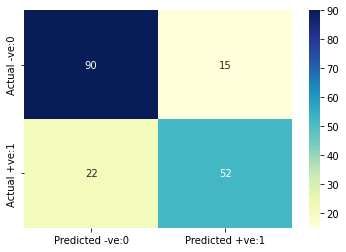

In [25]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'], 
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation

In [26]:
#Accuracy
(90+52)/(90+15+22+52)

0.7932960893854749

In [27]:
#Precision 
#Out of predicted as Survived, how many were actually survived?
print(52/(52+15))

0.7761194029850746


In [28]:
#Recall
#Out of all the survive, how many were actually survived?
print(52/(52+22))

0.7027027027027027


In [29]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.7932960893854749


In [30]:
from dmba import classificationSummary
classificationSummary(y_test, predictions, class_names = ['not-survived','survived'])

Confusion Matrix (Accuracy 0.7933)

             Prediction
      Actual not-survived     survived
not-survived           90           15
    survived           22           52


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [32]:
#Precision
print(90/(90+22)) #if Not survived is your relevant class
print(52/(52+15)) #if survived is your relevant class

0.8035714285714286
0.7761194029850746


In [33]:
#Recall
print(90/(90+15)) #if Not survived is your relevant class
print(52/(52+22)) #if survived is your relevant class

0.8571428571428571
0.7027027027027027


In [34]:
#Try different Threshold and check precision and recall
prediction_prob = lr_model.predict_proba(X_test)[:,1]
type(prediction_prob)
#predictions_threshold = 
prediction_prob[prediction_prob > 0.8] = 1
prediction_prob[prediction_prob <= 0.8] = 0

In [35]:
classificationSummary(y_test, prediction_prob, class_names = ['not-survived','survived'])

Confusion Matrix (Accuracy 0.7486)

             Prediction
      Actual not-survived     survived
not-survived          102            3
    survived           42           32


In [36]:
print(classification_report(y_test, prediction_prob))
#Recall up, Precicision down

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       105
           1       0.91      0.43      0.59        74

    accuracy                           0.75       179
   macro avg       0.81      0.70      0.70       179
weighted avg       0.79      0.75      0.72       179



In [37]:
#0.2
prediction_prob = lr_model.predict_proba(X_test)[:,1]
type(prediction_prob)
#predictions_threshold = 
prediction_prob[prediction_prob > 0.2] = 1
prediction_prob[prediction_prob <= 0.2] = 0

In [38]:
classificationSummary(y_test, prediction_prob, class_names = ['not-survived','survived'])

Confusion Matrix (Accuracy 0.7430)

             Prediction
      Actual not-survived     survived
not-survived           68           37
    survived            9           65


In [39]:
print(classification_report(y_test, prediction_prob))
#Recall down, precision up

              precision    recall  f1-score   support

           0       0.88      0.65      0.75       105
           1       0.64      0.88      0.74        74

    accuracy                           0.74       179
   macro avg       0.76      0.76      0.74       179
weighted avg       0.78      0.74      0.74       179



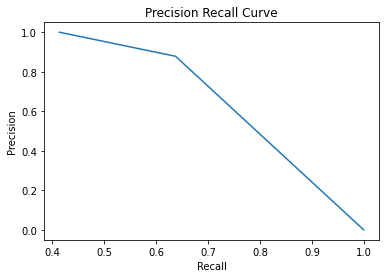

In [40]:
from sklearn.metrics import precision_recall_curve
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

AUC -  0.762998712998713


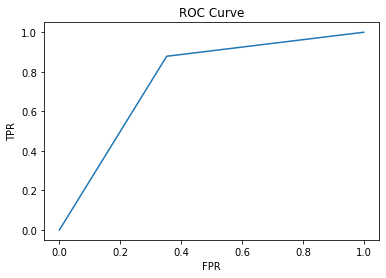

In [41]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("AUC - ",format(roc_auc))
# Plot Precision Recall curve
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()